# Analyzing the Relationship Between Bitcoin Spot Price and Futures Price 

By: Fred Etter

Data: The data I used for the "spot" price was obtained from Yahoo Finance:  https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch
The data I used for the CME futures price was obtained from Investing.com:  https://www.investing.com/crypto/bitcoin/bitcoin-futures

Key Terms: The **spot price** is the best estimate of the price of 1 Bitcoin which in this study is determined by averaging data from about 45 different exchanges around the world.  The **futures price** in this study is determined by the exchange operated by CME Group.  **Futures** are financial contracts obligating the buyer to purchase an asset or the seller to sell an asset, such as a physical commodity or a financial instrument, at a predetermined future date and price.  In this case, the future is "cash settled", so no actual bitcoins will change hands.

# Exploratory Data Analysis

In [8]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import data
df_usd = pd.read_csv('btc_usd_sep2_nov30.csv')
df_cme = pd.read_csv('btc_cme_sep2_nov30.txt', sep=",")

In [10]:
# print 1st 5 rows of df_usd
df_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-02,7301.250000,7350.580078,7204.890137,7270.049805,7270.049805,309327793
1,2018-09-03,7270.049805,7417.649902,7246.759766,7369.859863,7369.859863,343762001
2,2018-09-04,7369.890137,7401.430176,6694.060059,6705.029785,6705.029785,797851163
3,2018-09-05,6705.060059,6727.189941,6295.109863,6515.419922,6515.419922,823309044
4,2018-09-06,6515.419922,6549.390137,6345.479980,6411.779785,6411.779785,344487244


In [11]:
# Add Month column
df_usd['Month'] = df_usd["Date"].str.slice(5, 7)
df_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2018-09-02,7301.250000,7350.580078,7204.890137,7270.049805,7270.049805,309327793,09
1,2018-09-03,7270.049805,7417.649902,7246.759766,7369.859863,7369.859863,343762001,09
2,2018-09-04,7369.890137,7401.430176,6694.060059,6705.029785,6705.029785,797851163,09
3,2018-09-05,6705.060059,6727.189941,6295.109863,6515.419922,6515.419922,823309044,09
4,2018-09-06,6515.419922,6549.390137,6345.479980,6411.779785,6411.779785,344487244,09


In [12]:
# print 1st 5 rows of df_cme
df_cme.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 30, 2018","3,895.0","4,225.0","4,265.0","3,835.0",-,-7.59%
1,"Nov 29, 2018","4,215.0","4,205.0","4,350.0","4,060.0",-,0.24%
2,"Nov 28, 2018","4,205.0","3,775.0","4,345.0","3,770.0",-,11.39%
3,"Nov 27, 2018","3,775.0","3,650.0","3,775.0","3,550.0",-,4.28%
4,"Nov 26, 2018","3,620.0","3,930.0","4,025.0","3,510.0",-,-7.89%


In [13]:
# Create Month column
df_cme['Month'] = df_cme["Date"].str.slice(0, 3)
df_cme.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month
0,"Nov 30, 2018","3,895.0","4,225.0","4,265.0","3,835.0",-,-7.59%,Nov
1,"Nov 29, 2018","4,215.0","4,205.0","4,350.0","4,060.0",-,0.24%,Nov
2,"Nov 28, 2018","4,205.0","3,775.0","4,345.0","3,770.0",-,11.39%,Nov
3,"Nov 27, 2018","3,775.0","3,650.0","3,775.0","3,550.0",-,4.28%,Nov
4,"Nov 26, 2018","3,620.0","3,930.0","4,025.0","3,510.0",-,-7.89%,Nov


In [14]:
# Convert the 'Low' and 'High' column from text to float
df_cme["Low"] = [np.float(x.replace(",", "")) for x in df_cme["Low"]]
df_cme["High"] = [np.float(x.replace(",", "")) for x in df_cme["High"]]

# Check new High and Low columns
df_cme.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month
0,"Nov 30, 2018","3,895.0","4,225.0",4265.0,3835.0,-,-7.59%,Nov
1,"Nov 29, 2018","4,215.0","4,205.0",4350.0,4060.0,-,0.24%,Nov
2,"Nov 28, 2018","4,205.0","3,775.0",4345.0,3770.0,-,11.39%,Nov
3,"Nov 27, 2018","3,775.0","3,650.0",3775.0,3550.0,-,4.28%,Nov
4,"Nov 26, 2018","3,620.0","3,930.0",4025.0,3510.0,-,-7.89%,Nov


In [15]:
# Calculate the mean value of the 'Low' and 'High' columns
print("Low, CME")
print(df_cme['Low'].mean())
print(' ')
print("High, CME")
print(df_cme['High'].mean())

Low, CME
5977.76315789
 
High, CME
6200.72368421


In [16]:
print("Low, CME: {}".format(df_cme['Low'].mean()))

Low, CME: 5977.76315789


In [17]:
# Calculate the mean values for all of the columns in df_usd
print("USD mean values")
print(' ')
print(df_usd.mean())

USD mean values
 
Open         6.176153e+03
High         6.264355e+03
Low          6.041043e+03
Close        6.139058e+03
Adj Close    6.139058e+03
Volume       3.641961e+08
dtype: float64


In [110]:
# Group CME and USD data sets by month to calculate mean values
print("CME")
print(df_cme.groupby('Month').mean())
print(' ')
print("USD")
print(df_usd.groupby('Month').mean())

CME
              High          Low
Month                          
Nov    5470.384615  5179.807692
Oct    6482.200000  6341.000000
Sep    6678.800000  6444.400000
 
USD
              Open         High          Low        Close    Adj Close  \
Month                                                                    
09     6576.233112  6674.758284  6443.960668  6551.819959  6551.819959   
10     6484.464632  6561.385384  6417.326676  6475.810335  6475.810335   
11     5481.096012  5570.600358  5275.271020  5403.302694  5403.302694   

             Volume  
Month                
09     3.586248e+08  
10     2.775047e+08  
11     4.562731e+08  


## Question 1:  What are the mean values for Bitcoin High and Low daily prices for the spot price and the December futures price over a 3 month period ending November 30th ?

Answer:
USD-High = 6264, CME-High = 6201; difference of **63**. USD-Low = 6041, CME-Low = 5978; diff of **63** also.

## Question 2:  What are the differences in mean values grouped by month ?

Answer: 
Sep-High: 6675/6679, Sep-Low: 6444/6444, difference = **-4** and **0** (subtractinig CME from USD values)
Oct-High: 6561/6482, Oct-Low: 6417/6341, difference = **79** and **76**
Nov-High: 5571/5470, Nov-Low: 5275/5180, difference = **101** and **95**
(Further research:  Insert histogram for each mean value by month. i.e. USD-Sep-High vs CME-Sep-High; there will be 6 total bins)

## Question 3:  How does the price difference between spot and future change over time ?
Answer: 
**-2** in Sep, **77.5** in Oct, **98** in Nov (subtracting CME from USD values).  The difference is growing larger as the futures contract nears expiration.  (Further research:  Insert line graph for high and low values per month. i.e. High:  -4 to 79 to 101; Low:  0 to 76 to 95)

## Statistical Question:  How similar are the distributions of the "High" price of spot price vs. futures price ?  What do the distributions look like ?
Answer:  These distributions look very, very similar.  (Further research:  Perform t-test to compare more exact comparison)

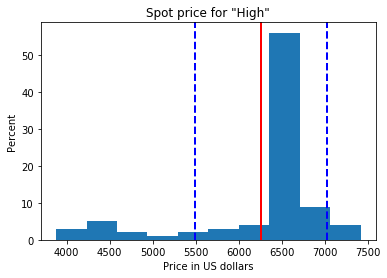

In [27]:
# Plot the spot "High" price as a histogram.
plt.hist(df_usd['High'])
plt.title('Spot price for "High"')
# Add a vertical line at the mean.
plt.axvline(df_usd['High'].mean(), color='red', linestyle='solid', linewidth=2)
# Add a vertical line at one standard deviation above the mean.
plt.axvline(df_usd['High'].mean() + df_usd['High'].std(), color='b', linestyle='dashed', linewidth=2)
# Add a vertical line at one standard deviation below the mean.
plt.axvline(df_usd['High'].mean()-df_usd['High'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Price in US dollars')
plt.ylabel('Percent')
plt.show()

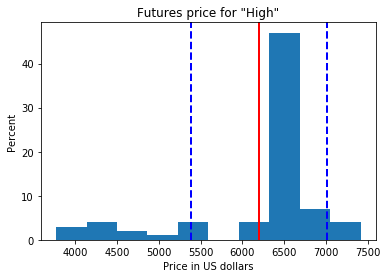

In [28]:
# Plot the futures "High" price as a histogram.
plt.hist(df_cme['High'])
plt.title('Futures price for "High"')
# Add a vertical line at the mean.
plt.axvline(df_cme['High'].mean(), color='red', linestyle='solid', linewidth=2)
# Add a vertical line at one standard deviation above the mean.
plt.axvline(df_cme['High'].mean() + df_cme['High'].std(), color='b', linestyle='dashed', linewidth=2)
# Add a vertical line at one standard deviation below the mean.
plt.axvline(df_cme['High'].mean()-df_cme['High'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Price in US dollars')
plt.ylabel('Percent')
plt.show()

## Further Research
I would like to compare the Cboe Bitcoin futures data with CME futures data as well as comparing Cboe data against the spot price.  This additional Cboe data can also be found on [Investing.com](www.investing.com).

## Conclusion
**Convergence** is the movement of the price of a futures contract towards the spot price of the underlying cash security as the delivery date approaches. The two prices must converge, or else traders would exploit any price difference to make a risk-free profit.

In the case of Bitcoin futures we see that the price does not converge, it actually widens as the futures contract moves closer to expiration.  I would have expected to see price convergence - instead we see the opposite.
